In [1]:
# -*- coding:utf-8 -*-
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ta
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

In [2]:
path='C:/Users/dsquant06/Desktop/test/month.csv'


In [3]:

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    #rol_weighted_mean = pd.ewma(timeSeries, span=size)
    rol_weighted_mean = timeSeries.ewm(size)
    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.xlabel('samples')
    plt.ylabel('return')
    plt.savefig("C:/Users/dsquant06/Desktop/test/股指回归/趋势图.pdf")
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf(ts, lags=92):
    f = plt.figure(facecolor='white')
    #ax1 = f.add_subplot(211)
    plot_acf(ts, lags=92)
    plt.xlabel('lags')
    plt.ylabel('correlation coefficient')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.1, hspace=1)
    plt.savefig("C:/Users/dsquant06/Desktop/test/股指回归/自相关图.pdf")
    plt.show()
    
        
def draw_pacf(ts,lags=46):
    f = plt.figure(facecolor='white')
    #ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=46)
    plt.xlabel('lags')
    plt.ylabel('correlation coefficient')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.1, hspace=1)
    plt.savefig("C:/Users/dsquant06/Desktop/test/股指回归/偏相关图.pdf")
    plt.show()
    

In [4]:
df=pd.read_csv(path)


In [5]:
df.columns.values[1:]

array(['momentum', 'size', 'beta', 'roe_ttm', 'book_to_price_ratio',
       'jingzhi', 'MKT', 't', 'premium'], dtype=object)

In [6]:
index='jingzhi'
#将dataframe的数据类型转换为array的行向量
df=df.loc[:,[index]]
ts=np.array(pd.DataFrame(df.values.T))[0]

<Figure size 432x288 with 0 Axes>

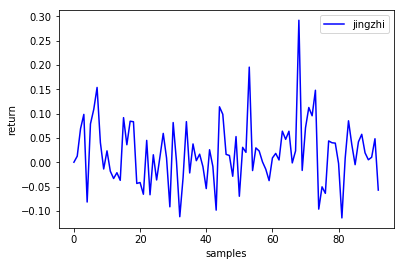

<Figure size 432x288 with 0 Axes>

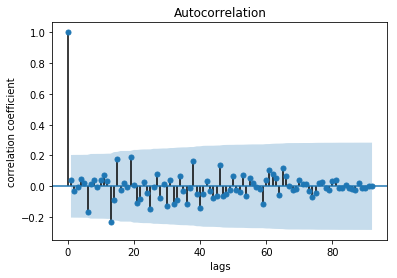

<Figure size 432x288 with 0 Axes>

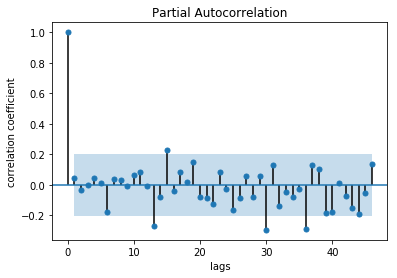

In [7]:
draw_ts(df)
draw_acf(ts,92)
draw_pacf(ts,46)

In [8]:
testStationarity(ts)

Test Statistic                -9.010625e+00
p-value                        6.139861e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64